## 4

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [4]:
sales[sales['sales']>10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [6]:
sales[sales['year']==2018]

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [10]:
sales[(sales['year']==2018) & (sales['sales']>13)]

,employee,sales,year
0,Katrina,14,2018


In [11]:
sales[(sales['year']!=2018) & (sales['sales']<13)]

,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [12]:
sales[sales['sales']/3 >3]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [14]:
sales[sales['employee'].str[0]>'J']

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018
5,Paola,3,2019


## 5

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
len(df['Name'].unique())

11493

In [18]:
generi = df['Genre'].value_counts()
generi

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

<Axes: xlabel='Genre'>

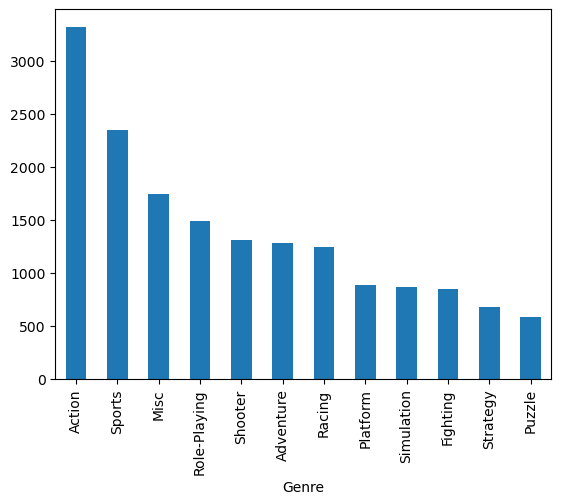

In [19]:
generi.plot(kind='bar')

<Axes: xlabel='Year'>

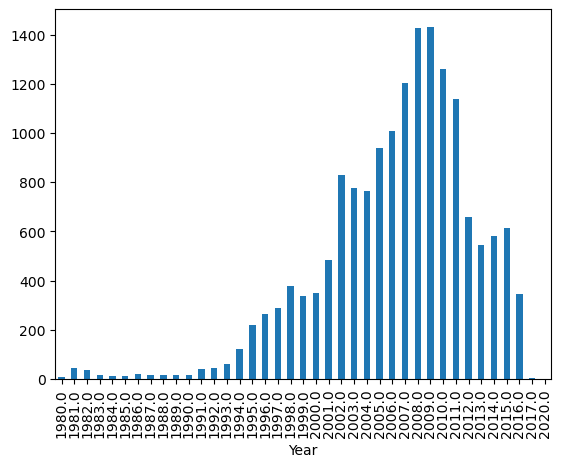

In [20]:
conta_anni = df['Year'].value_counts().sort_index()

conta_anni.plot(kind='bar')

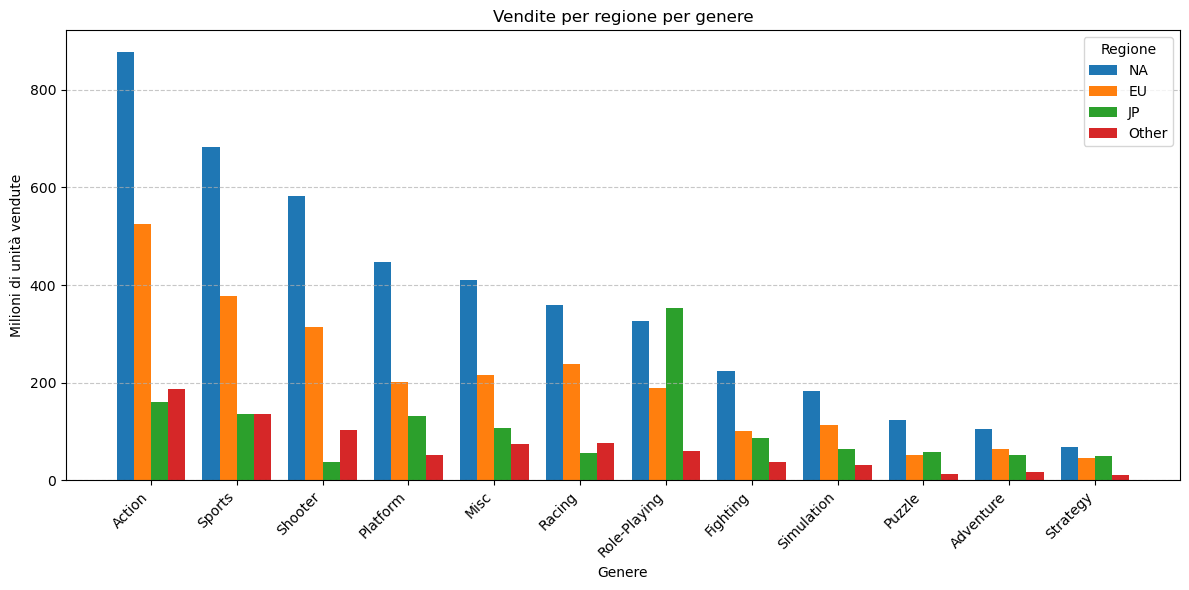

C:\Users\madda\AppData\Local\Temp\ipykernel_20152\2355580096.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(genres, rotation=90, ha='center', fontsize=11)


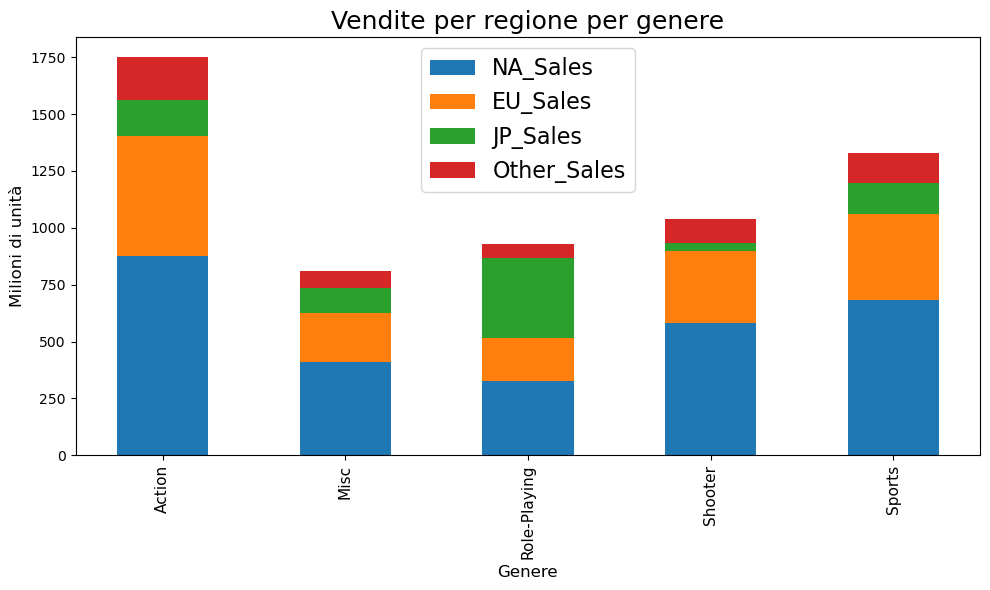

In [47]:
selected_genres = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
df_filtered = df[df['Genre'].isin(selected_genres)].copy()

genre_sales = df_filtered.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

genre_sales = genre_sales.reindex(selected_genres)

genres = genre_sales.index
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, ax = plt.subplots(figsize=(10, 6))

bottom_values = np.zeros(len(genres))

for i, region in enumerate(regions):
    values = genre_sales[region].values
    ax.bar(genres, values, bottom=bottom_values, 
           label=region, width=0.5)
    bottom_values += values

ax.set_xlabel('Genere', fontsize=12)
ax.set_ylabel('Milioni di unità', fontsize=12)
ax.set_title('Vendite per regione per genere', fontsize=18)
ax.legend(fontsize=16, loc='upper center')
ax.set_xticklabels(genres, rotation=90, ha='center', fontsize=11)

plt.tight_layout()
plt.show()